# <a href="https://thetahat.ru/courses/bm-2024-aut">Статистика ФБМФ</a>
## Домашнее задание 11

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_st_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb`.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков можно использовать без ограничений.**

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 15 баллов
* Задача 2 &mdash; 25 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 3 &mdash; 30 баллов


-----

In [2]:
# Bot check

# HW_ID: st_hw11
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [133]:
import numpy as np
import scipy.stats as sps
from scipy.special import binom
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set(palette='Set2')

## <b><i><font color="blue">Легкая часть</font></i></b> 


### Задача 1

 Пусть $X_1, ...,  X_n$ --- выборка из неизвестного распределения $\mathsf{P}$. Для проверки гипотез $\mathsf{H}_0\ vs.\ \mathsf{H}_1$ было решено использовать три различных критерия. Соответствующие p-value равны 0.00001, 0.7361, 0.0482. Какое должно быть принято решение об отвержении гипотезы $\mathsf{H}_0$ на уровне значимости 0.05?

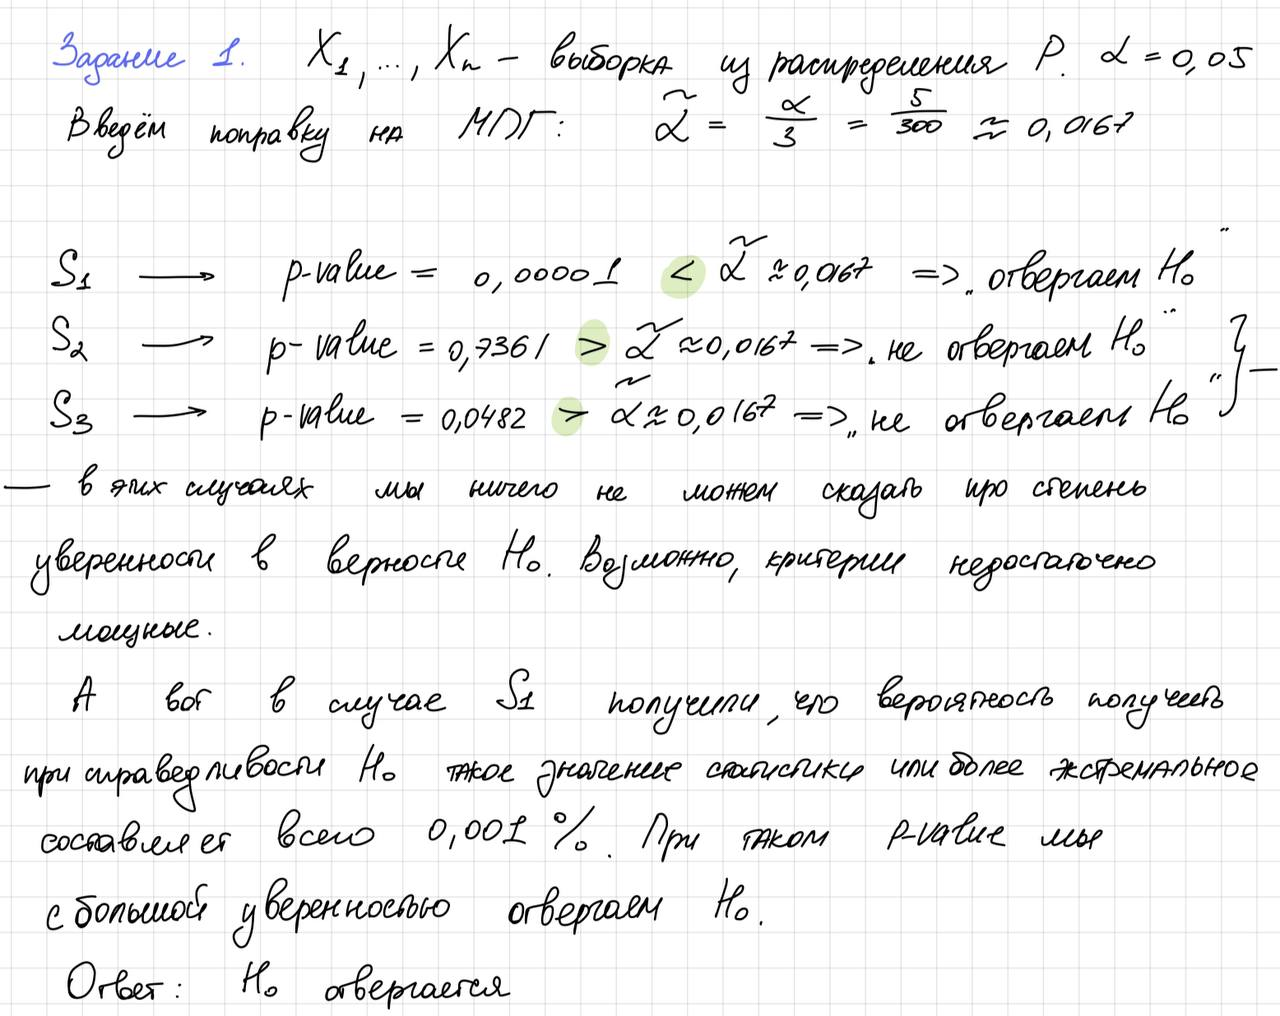

### Задача 2

Проведены эксперименты для оценки эффективности нескольких препаратов для снижения послеоперационной тошноты. Результаты экспериментов приведены в таблице ниже. При проведении эксперимента пациенты делились на группы случайным образом.

    
|| Количество пациентов   | Количество случаев возникновения тошноты |
|-----------| ----------- | -------|
|Плацебо|80|45|
|Хлорпромазин|75|26|
|Дименгидринат|85|52|
|Пентобарбитал (100 мг)|67|35|
|Пентобарбитал (150 мг)|85|37|

    

In [35]:
data = pd.DataFrame([["Плацебо", 80, 45],
    ["Хлорпромазин", 75, 26],
    ["Дименгидринат", 85, 52],
    ["Пентобарбитал (100 мг)", 67, 35],
    ["Пентобарбитал (150 мг)", 85, 37]])

data.columns = ["Название", "Количество пациентов", "Количество случаев возникновения тошноты"]

Для каждой пары плацебо / препарат нас имеются две бернуллиевские выборки: $$X = (X_1, \ldots, X_n) \sim Bern(\theta_1) \\ Y = (Y_1, \ldots, Y_m) \sim Bern(\theta_2)$$
Первая из которых будет соответствовать какому-то препарату (индикатор того, что тошнота **отсутствует**), а вторая &mdash; плацебо.

Проверяется $\mathsf{H}_0 \colon \theta_1 = \theta_2 \ vs. \ \mathsf{H}_1 \colon \theta_1 > \theta_2$.

Будем использовать критерий Вальда (см. пример с лекции):
$$
W(X, Y) = \frac{\overline{X} -\overline{Y}}{\widehat{\sigma}} \xrightarrow[]{d_0} \mathcal{N}(0, 1) \\
\widehat{\sigma} = \sqrt{\frac{\overline{X}(1 - \overline{X})}{n} + \frac{\overline{Y}(1 - \overline{Y})}{m}}
$$



Формула подсчета p-value: 

$p(w) = Ф(W(X,Y) \geq w)$ = scipy.stats.norm.sf(w)


Для удобства выделим подсчет статистики Вальда в функцию. Вам остаётся лишь заполнить её

In [46]:
def wald_stats(x_mean, n, y_mean, m):
    '''
    Подсчет значения статистики Вальда.
    
    :param x_mean: среднее значение по выборке X
    :param n: размер выборки X
    :param y_mean: среднее значение по выборке Y
    :param m: размер выборки Y
    
    :return: посчитанное значение статистики Вальда
    '''
    sigma = np.sqrt((x_mean*(1 - x_mean)/n)+(y_mean*(1 - y_mean)/m))
    return (x_mean - y_mean)/sigma

 Проведите сравнение каждого препарата по эффективности по отношению к плацебо c использованием критерия Вальда. Приведите значения статистики критерия Вальда, p-value и скорректированные p-value (т.е. примените метод Бонферрони). 

In [57]:
placebo_data = data[data["Название"] == "Плацебо"]
placebo_n = placebo_data["Количество пациентов"].iloc[0]
placebo_k = placebo_data["Количество случаев возникновения тошноты"].iloc[0]
placebo_mean = 1 - (placebo_k / placebo_n)

results = []
for index, row in data[data["Название"] != "Плацебо"].iterrows():
    name = row["Название"]
    n = row["Количество пациентов"]
    k = row["Количество случаев возникновения тошноты"]
    mean = 1 - (k / n)
    wald = wald_stats(mean, n, placebo_mean, placebo_n)
    p_value = sps.norm.sf(wald)
    results.append([name, wald, p_value])

results_df = pd.DataFrame(results, columns=["Название", "Статистика Вальда", "p-value"])
results_df["p-value (Бонферрони)"] = results_df["p-value"] * len(results_df)

results_df

,Название,Статистика Вальда,p-value,p-value (Бонферрони)
0,Хлорпромазин,2.764364,0.002852,0.011407
1,Дименгидринат,-0.642987,0.739884,2.959535
2,Пентобарбитал (100 мг),0.486428,0.313332,1.253328
3,Пентобарбитал (150 мг),1.646605,0.049820,0.199278


Не забудьте про выводы

На уровне значимости 0,05 получаем, что $H_0$ отвергаем только ддля Хлорпромазина. Как с поправкой на МПГ, так и без p-value < 0,05, также статистика Вальда 2,76 > $Z_{1 - \alpha}$ =1,64. Для остальлных препаратов, учитывая поправку на МПГ, отвергнуть $H_0$ не можем.


## <b><i><font color="orange">Сложная часть</font></i></b>

### Задача 3


Пусть $X_1, ..., X_n \sim Bern(p)$ &mdash; проведенные наблюдения, где $X_i = 1$, если в $i$-м испытании случилась неудача после того, как черный кот перебежал дорогу, а $p$ &mdash; неизвестная вероятность такого события. 
Вы хотите проверить гипотезу $\mathsf{H}_0\colon p=1/2$ против альтернативы $\mathsf{H}_1\colon p>1/2$. Нулевая гипотеза означает отсутствие связи между черным котом и неудачей, первая &mdash; что неудача происходит чаще если черный кот перебегает дорогу.


Для этой задачи воспользуемся критерием $$S = \left\{T(X) \geqslant c_\alpha\right\},$$ где $T(X) = \sum_{i=1}^n X_i$, критическое значение $c_\alpha = u_{1-\alpha} + 1$.

Чему тогда будет равно значение p-value?

$p(t) = \frac{1}{2^n} \sum_{j=t}^{n} C^{j}_{n}$

Перед началом эксперимента стоит задаться вопросом, а каким должно быть истинное значение $p$, чтобы с точки зрения практики можно было бы считать, что связь между черным котом и неудачей имеется? 

Вообще говоря, пороговое значение должно выбираться отдельно для каждой задачи. В данном случае можем считать, что если $p \geqslant 0.6$, то связь есть. 

Следующий вопрос &mdash; сколько необходимо провести экспериментов? Никто не хочет долго ждать, а уж тем более расходовать огромное количество ресурсов на большое количество экспериментов, однако все хотят, чтобы у критерия была достаточная мощность.

Для начала сгенерируйте 10 выборок для двух случаев: 
1. $n=5, p=0.75$; 
2. $n=10^5, p=0.51$. 

В каждом случае в виде таблицы выведите реализацию статистики $T(X)$, соответствующее p-value и 0/1 &mdash; отвергается ли $\mathsf{H}_0$ (выводите 1, если отвергается).

In [165]:
def test_hypothesis(n, p, alpha=0.05):
    X = sps.bernoulli.rvs(p = p, size= n)
    t = np.sum(X)
    p_value = sps.binom.sf(t-1, n, 0.5)
    reject = 1 if p_value <= alpha else 0
    return t, p_value, reject
results=[]
for i in range (10):
    t1, p_value1, reject1 = test_hypothesis(5, 0.75)
    results.append(['n=5, p=0.75', t1, p_value1, reject1])
for i in range (10):
    t2, p_value2, reject2 = test_hypothesis(100000, 0.51)
    results.append(['n=10^5, p=0.51', t2, p_value2, reject2])
results_df = pd.DataFrame(results, columns=['Тип выборки', 'T(X)', 'p-value', 'Отвергается H0'])
results_df



,Тип выборки,T(X),p-value,Отвергается H0
0,"n=5, p=0.75",3,5.000000e-01,0
1,"n=5, p=0.75",4,1.875000e-01,0
2,"n=5, p=0.75",4,1.875000e-01,0
3,"n=5, p=0.75",5,3.125000e-02,1
4,"n=5, p=0.75",4,1.875000e-01,0
5,"n=5, p=0.75",5,3.125000e-02,1
6,"n=5, p=0.75",4,1.875000e-01,0
7,"n=5, p=0.75",4,1.875000e-01,0
8,"n=5, p=0.75",3,5.000000e-01,0
9,"n=5, p=0.75",4,1.875000e-01,0


**Вывод:** При малом размере выборки почти ничего не отклоняется, так как мощность небольшая. А при больших выборках отклонения есть практически всегда, потому что небольшие отличия от $H_0$ будут почти всегда.

Теперь разберемся с тем, как подобрать оптимальный размер выборки.

1. Зафиксируйте значение $p^* > 1/2$ (в нашем случае $p^* = 0.6$ ), которое будет обладать следующим свойством.
    - Если истинное $p > p^*$, то такое отклонение от $1/2$ с практической точки зрения признается существенным, то есть действительно чаще случается неудача после того, как черный кот перебегает дорогу.
    - В противном случае отклонение с практической точки зрения признается несущественным.
2. Для некоторых $n$ постройте графики функции мощности критерия при $1/2 < p < 1$ и уровне значимости 0.05 (пример таких графиков можно найти в лекции).
3. Выберите такое $n^*$, для которого функция мощности дает значение 0.8 при $p^*$. Это значение необходимой мощности критерия определяется на этапе постановки задачи и дизайна эксперимента.

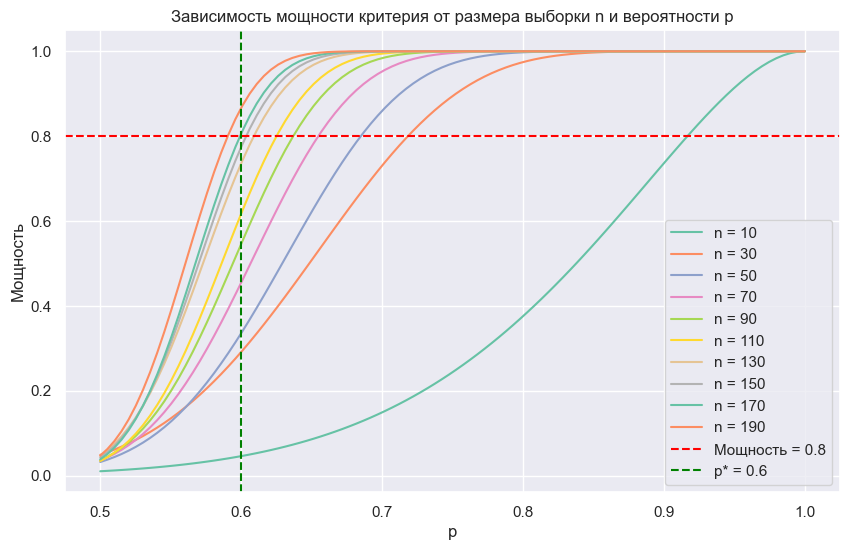

In [202]:
def power(n, p, alpha=0.05):
    power_values = []
    for t in range(n + 1):
        p_val = sps.binom.sf(t-1, n, 0.5)
        if p_val <= alpha:
            power_values.append(binom.pmf(t, n, p))
    return np.sum(power_values)
p_star = 0.6
alpha = 0.05
power_target = 0.8
n_values = np.arange(10, 201, 20)
p_values = np.linspace(0.5, 1, 100)

plt.figure(figsize=(10, 6))
for n in n_values:
    power_curve = [power(n, p) for p in p_values]
    plt.plot(p_values, power_curve, label=f'n = {n}')

plt.axhline(y=power_target, color='r', linestyle='--', label=f'Мощность = {power_target}')
plt.axvline(x=p_star, color='g', linestyle='--', label=f'p* = {p_star}')
plt.xlabel('p')
plt.ylabel('Мощность')
plt.title('Зависимость мощности критерия от размера выборки n и вероятности p')
plt.legend()
plt.grid(True)
plt.show()

In [214]:
#  Поиск n*, такого, что power(n*, p_star) ≈ power_target

n_values = np.arange(150, 201, 1)
p_values = np.linspace(0.5, 1, 50)

plt.figure(figsize=(10, 6))
for n in n_values:
    power_curve = [power(n, p) for p in p_values]

n_star = None
for n in n_values:
    if abs(power(n, p_star) - power_target) < 0.01:
        n_star = n
        break

if n_star:
    print(f"Найден оптимальный размер выборки n* = {n_star}, при котором мощность при p* = {p_star} составляет приблизительно {power(n_star, p_star):.2f}")
else:
    print("Оптимальный размер не найден")


Найден оптимальный размер выборки n* = 154, при котором мощность при p* = 0.6 составляет приблизительно 0.79


<Figure size 1000x600 with 0 Axes>

Для выбранного $n^*$ в виде таблицы выведите реализацию статистики $T(X)$, соответствующее p-value и результат проверки, сгенерировав выборки для следующих истинных значений $p$: 
 1. $1/2 < p < p^*$; 
 2. $p > p^*$.

In [220]:
results=[]
n = 154
ps = np.arange(0.5, 0.61, 0.01)
for p in ps:
    t1, p_value1, reject1 = test_hypothesis(n, p)
    results.append(['$1/2 < p < p^*$', t1, p_value1, reject1])
ps2 = np.arange(0.61, 0.72, 0.01)
for p in ps2:
    t2, p_value2, reject2 = test_hypothesis(n, p)
    results.append(['$p > p^*$', t2, p_value2, reject2])
results_df = pd.DataFrame(results, columns=['Тип выборки', 'T(X)', 'p-value', 'Отвергается H0'])
results_df

,Тип выборки,T(X),p-value,Отвергается H0
0,$1/2 < p < p^*$,66,9.682624e-01,0
1,$1/2 < p < p^*$,76,5.954637e-01,0
2,$1/2 < p < p^*$,76,5.954637e-01,0
3,$1/2 < p < p^*$,88,4.513836e-02,1
4,$1/2 < p < p^*$,83,1.877284e-01,0
5,$1/2 < p < p^*$,90,2.179997e-02,1
6,$1/2 < p < p^*$,79,4.045363e-01,0
7,$1/2 < p < p^*$,86,8.525827e-02,0
8,$1/2 < p < p^*$,92,9.575094e-03,1
9,$1/2 < p < p^*$,92,9.575094e-03,1


**Вывод:** Подобрав оптимальный размер выборки видим, что при достижении подобранного p* = 0,6 мы практически всегда отвергаем $H_0$ (в наших выборках все) и логчино брать это значение для порогового значения значимости, а для значений p < p* получаем, что бывают выборки с отвержением и нет.
Как уже отмечалось, оптимальный размер выборки нужен, так как при больших выборках отклонения есть практически всегда